In [1]:
%matplotlib inline
from google.colab import files
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Collect images path as numpy array
imagepaths = []
os.chdir("/content/drive/MyDrive/Colab Notebooks/Bitirme Projesi/SignLanguageData/onlyme")
for root, dirs, files in os.walk(".", topdown=False):
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("jpg"):
      imagepaths.append(path)

  print(len(imagepaths)) 

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8400


In [3]:
def plot_image(path):
  img = cv.imread(path)
  img_cvt = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  print(img_cvt.shape)
  plt.grid(False)
  plt.imshow(img_cvt)
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Frame " + path)

(500, 500)


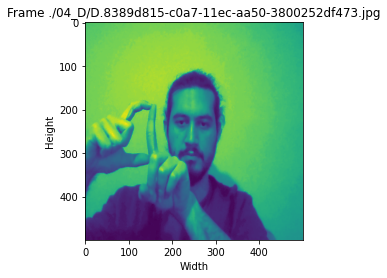

In [4]:
plot_image(imagepaths[0])

In [5]:
x = [] # Image data
y = [] # Labels

for path in imagepaths:
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img = cv.resize(img, (320, 120))
  x.append(img)

  # processing label in image path
  category = path.split("/")[1]
  label = int(category.split("_")[0])
  y.append(label)

# turn x and y into np.array to speed up train_test_split
x = np.array(x, dtype="uint8")
x = x.reshape(len(imagepaths), 120, 320 , 1) # needed to reshape so CNN knows it's different images
y = np.array(y)


print("Images loaded: ", len(x))
print("Labels loaded: ", len(y))
print(y[0], imagepaths[0]) # debugging

Images loaded:  8400
Labels loaded:  8400
4 ./04_D/D.8389d815-c0a7-11ec-aa50-3800252df473.jpg


In [6]:
ts = 0.3 # precentage of images that we want to use for testing. The rest is used for training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = ts, random_state=42)

In [27]:
print("x_Train size: ", x_train.size)
print("x_Test size: ", x_test.size)
print("y_Train size: ", y_train.size)
print("y_Test size: ", y_test.size)

x_Train size:  225792000
x_Test size:  96768000
y_Train size:  5880
y_Test size:  2520


**Creating Model**

In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [8]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(42, activation='softmax'))


In [9]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter value to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad out predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [10]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/5
92/92 - 20s - loss: 4.6140 - accuracy: 0.7917 - val_loss: 0.0498 - val_accuracy: 0.9837 - 20s/epoch - 223ms/step
Epoch 2/5
92/92 - 6s - loss: 0.0455 - accuracy: 0.9893 - val_loss: 0.0200 - val_accuracy: 0.9901 - 6s/epoch - 67ms/step
Epoch 3/5
92/92 - 6s - loss: 0.0288 - accuracy: 0.9920 - val_loss: 0.0184 - val_accuracy: 0.9909 - 6s/epoch - 67ms/step
Epoch 4/5
92/92 - 6s - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0229 - val_accuracy: 0.9913 - 6s/epoch - 67ms/step
Epoch 5/5
92/92 - 6s - loss: 0.0213 - accuracy: 0.9918 - val_loss: 0.0191 - val_accuracy: 0.9909 - 6s/epoch - 67ms/step


In [11]:
# save entire model to HDF5 file
model.save('signlanguagerecognition_model_allData.h5')

In [12]:
# load entire model
tf.keras.models.load_model('signlanguagerecognition_model_allData.h5')

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

79/79 [==============================] - 1s 13ms/step - loss: 0.0191 - accuracy: 0.9909
Test accuracy: 99.09%


In [14]:
predictions = model.predict(x_test) # Make predictions towards the test set

In [15]:
np.argmax(predictions[0]), y_test[0] # IF same, got it right

(4, 4)

In [16]:
# Function to plot images and labels for validation purposes
def validate_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["A", "B", "C", "Ç", "D", "E", "F", "G", "H", "I", "İ", "J", "K", 
                 "L", "M", "N", "O", "Ö", "P", "Q", "R", "S", "Ş", "T", "U", "Ü", 
                 "V", "W", "X", "Y", "Z", "VAR", "YOK", "İYİ", "KÖTÜ", "ERKEK", "KADIN",
                 "MERHABA", "EV", "BİLGİSAYAR", "TELEFON", "PROBLEM"] 
  plt.figure(figsize=(30,20))
  
  for i in range(1, 65):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(8,8,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    
    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

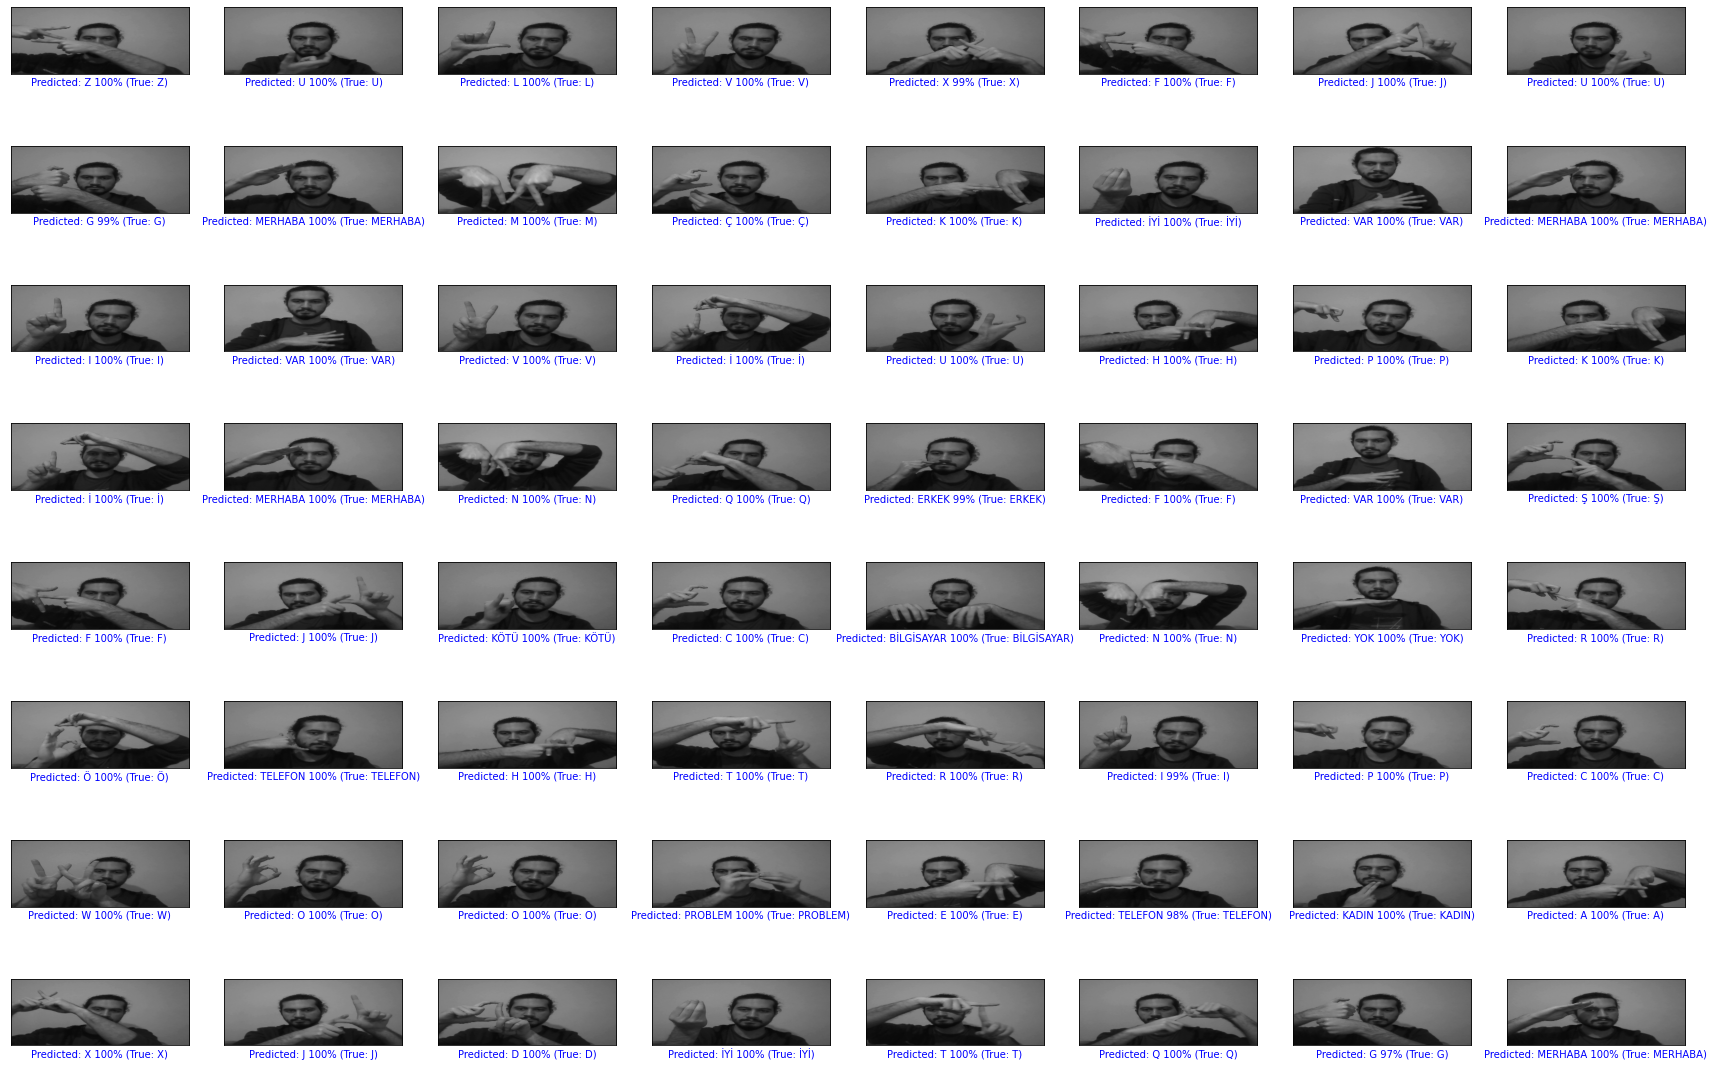

In [17]:
validate_images(predictions, y_test, x_test)

In [18]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number

In [19]:
# H = Horizontal
# V = Vertical

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=["Tahmini A", "B", "C", "Ç", "D", "E", "F", "G", "H", "I", "İ", "J", "K", 
                 "L", "M", "N", "O", "Ö", "P", "Q", "R", "S", "Ş", "T", "U", "Ü", 
                 "V", "W", "Y", "Z", "VAR", "YOK", "İYİ", "KÖTÜ", "ERKEK", "KADIN",
                 "MERHABA", "EV", "BİLGİSAYAR", "TELEFON", "TELEFON", "PROBLEM"],
             index=["Gercek A", "B", "C", "Ç", "D", "E", "F", "G", "H", "I", "İ", "J", "K", 
                 "L", "M", "N", "O", "Ö", "P", "Q", "R", "S", "Ş", "T", "U", "Ü", 
                 "V", "W", "Y", "Z", "VAR", "YOK", "İYİ", "KÖTÜ", "ERKEK", "KADIN", 
                 "MERHABA", "EV", "BİLGİSAYAR", "TELEFON", "TELEFON", "PROBLEM"])
              

,Tahmini A,B,C,Ç,D,E,F,G,H,I,...,İYİ,KÖTÜ,ERKEK,KADIN,MERHABA,EV,BİLGİSAYAR,TELEFON,TELEFON,PROBLEM
Gercek A,65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,0,61,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0,0,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ç,0,0,0,63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,77,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,74,0,0,...,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,0,0,73,...,0,0,0,0,0,0,0,0,0,0
